In [1]:
%load_ext autoreload
%autoreload 2
# %matplotlib inline
# %config InlineBackend.figure_format = 'svg'

In [2]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.font_manager import FontProperties
from cycler import cycler
import numpy as np
# import cigvis
import re
c = ['#da7b36', '#3ec8b2', '#0b565a', '#aebf4f', '#ef3c29']

In [3]:
plt.rcParams.update({
    'font.family': ['Arial', 'SimHei'],

    'xtick.minor.visible': True,
    'ytick.minor.visible': True,

    'xtick.minor.size': 4,
    'ytick.minor.size': 4,
    'xtick.major.size': 6,
    'ytick.major.size': 6,

    'xtick.minor.width': 0.8,
    'ytick.minor.width': 0.8,

    'axes.grid': True,
    'grid.linestyle': '--',
    'grid.linewidth': 0.8,
    'grid.alpha': 0.8,

    'axes.facecolor': (0.95, 0.95, 0.95),

    # color cycle
    'axes.prop_cycle': cycler('color', [
        '#da7b36', '#3ec8b2', '#0b565a', '#aebf4f',
        '#ef3c29', '#fbcf48', '#f7f5c4', '#21d1cb', '#016d66'
    ]),

    # # ----------- Font Settings (your preferred setup) ----------
    # 'font.family': ['Helvetica Neue'],
    # 'font.weight': 'bold',          # equivalent to weight=700
    # 'font.stretch': 'condensed',    # condensed style

    # 推荐增加的（Nature 级字体）
    'font.size': 18,
    'axes.labelsize': 20,
    'axes.titlesize': 20,
    'xtick.labelsize': 18,
    'ytick.labelsize': 18,
    'legend.fontsize': 16,
})

In [4]:
def darken(color, factor=0.7):
    """将颜色调暗，factor < 1 越暗"""
    r, g, b, a = mcolors.to_rgba(color)
    return (r*factor, g*factor, b*factor, a)

def lighten(color, factor=0.7):
    """
    将颜色变浅，factor 越小越接近白色
    factor=1.0 表示原色，0 表示纯白
    """
    r, g, b, a = mcolors.to_rgba(color)
    return (r + (1-r)*(1-factor),
            g + (1-g)*(1-factor),
            b + (1-b)*(1-factor),
            a)


In [5]:
def set_title_font(fontdict):
    # fontdict = _preprocess_font(fontdict)
    fig = plt.gcf()
    axes_list = fig.get_axes()
    for ax in axes_list:
        if isinstance(fontdict, dict) and  'size' not in fontdict:
            size = ax.title.get_fontsize()
            fontdict['size'] = size
        ax.title.set_fontproperties(fontdict)


def set_label_font(fontdict):
    # fontdict = _preprocess_font(fontdict)
    fig = plt.gcf()
    axes_list = fig.get_axes()
    for ax in axes_list:
        if isinstance(fontdict, dict) and  'size' not in fontdict:
            size = ax.xaxis.label.get_fontsize()
            fontdict['size'] = size
        ax.xaxis.label.set_fontproperties(fontdict)
        ax.yaxis.label.set_fontproperties(fontdict)


def set_tick_font(fontdict):
    # fontdict = _preprocess_font(fontdict)
    fig = plt.gcf()
    axes_list = fig.get_axes()
    for ax in axes_list:
        for tick in ax.get_yticklabels():
            if isinstance(fontdict, dict) and  'size' not in fontdict:
                size = tick.get_fontsize()
                fontdict['size'] = size
            tick.set_fontproperties(fontdict)

        for tick in ax.get_xticklabels():
            if isinstance(fontdict, dict) and  'size' not in fontdict:
                size = tick.get_fontsize()
                fontdict['size'] = size
            tick.set_fontproperties(fontdict)



def set_legend_font(fontdict):
    # fontdict = _preprocess_font(fontdict)
    fig = plt.gcf()
    axes_list = fig.get_axes()
    for ax in axes_list:
        legend = ax.get_legend()
        if legend is not None:
            for text in legend.get_texts():
                if isinstance(fontdict, dict) and  'size' not in fontdict:
                    size = text.get_fontsize()
                    fontdict['size'] = size
                text.set_fontproperties(fontdict)

In [6]:
font = FontProperties(family=['Helvetica Neue', 'Microsoft YaHei'], weight=700, stretch='condensed')
afont = FontProperties(family=['Arial', 'Microsoft YaHei'])
def set_hcnb():
    set_title_font(font)
    set_label_font(font)
    set_tick_font(afont)
    set_legend_font(font)

In [7]:
results = {}
with open('../../results/infer25ce/FaultSeg3d.txt', 'r') as f:
    for line in f:
        # 4, [704, 704, 704], 12.56, 2.6860
        # seg this line
        rank, shape, mem, t = re.findall(r'[\d.]+|\[.*?\]', line)
        shape = [int(f.strip()) for f in shape[1:-1].split(',')]
        voxels = shape[0] * shape[1] * shape[2]
        if rank not in results:
            results[rank] = [[voxels, float(mem), float(t)]]
        else:
            results[rank].append([voxels, float(mem), float(t)])

for k in results.keys():
    results[k] = np.array(results[k])

/tmp/ipykernel_1946980/3200996016.py:95: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(0, ticks)


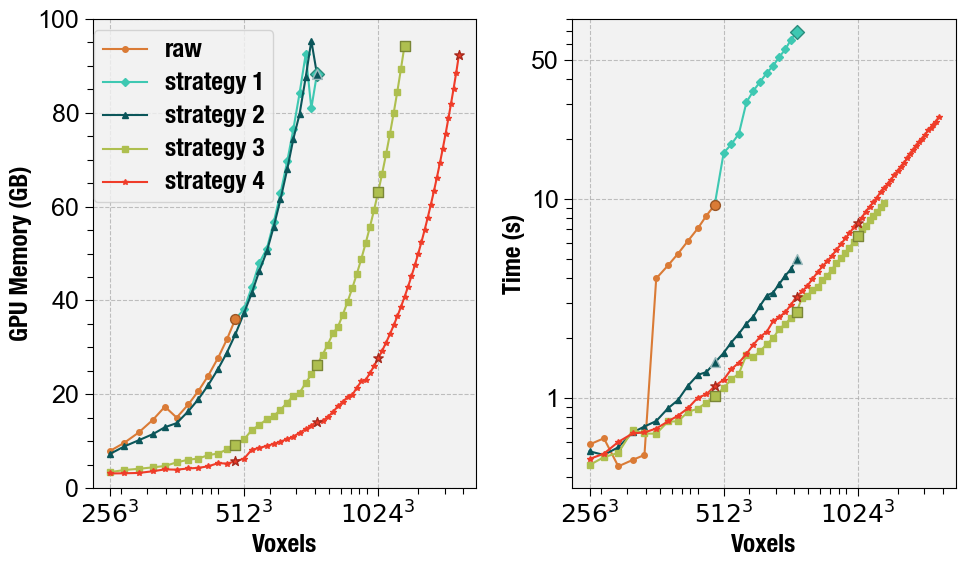

In [8]:

markers = ['o', 'D', '^', 's', '*']
fig, ax = plt.subplots(1, 2, figsize=(10, 6))


# for a in ax:
#     a.tick_params(axis='both', labelsize=16)  # Tick label size


for i, (k, v) in enumerate(results.items()):
    v = np.array(v)
    zorder = int(k) + 4
    label = f'strategy {k}'
    if k == '0':
        zorder = 5
        label = 'raw'
    if k == '1':
        l = len(results['0'])
        v = v[l-1:]
        zorder = 4
    
    ax[0].plot(v[:, 0], v[:, 1], label=label, marker=markers[i], markersize=4, zorder=zorder)

v0 = results['0']
v1 = results['1']
v2 = results['2']
v3 = results['3']
v4 = results['4']
x = [v0[-1, 0],]
y = [v0[-1, 1],]
ax[0].scatter(x, y, c=c[0], s=50, marker='o', zorder=10, edgecolor=darken(c[0]))
x = [v1[-1, 0],]
y = [v1[-1, 1],]
ax[0].scatter(x, y, c=c[1], s=50, marker='D', zorder=10, edgecolor=darken(c[1]))
x = [v2[-1, 0],]
y = [v2[-1, 1],]
ax[0].scatter(x, y, c=c[2], s=50, marker='^', zorder=10, edgecolor=lighten(c[2], 0.4))
x = [v3[v0.shape[0]-1, 0], v3[v2.shape[0]-1, 0], 1024**3, v3[-1, 0]]
y = [v3[v0.shape[0]-1, 1], v3[v2.shape[0]-1, 1], v3[36, 1], v3[-1, 1]]
ax[0].scatter(x, y, c=c[3], s=50, marker='s', zorder=10, edgecolor=darken(c[3]))
x = [v4[v0.shape[0]-1, 0], v4[v2.shape[0]-1, 0], 1024**3, v4[-1, 0]]
y = [v4[v0.shape[0]-1, 1], v4[v2.shape[0]-1, 1], v4[36, 1], v4[-1, 1]]
ax[0].scatter(x, y, c=c[4], s=50, marker='*', zorder=10, edgecolor=darken(c[4]))

ax[0].set_xscale('log')
xticks = [256**3, 512**3, 1024**3]
xtick_labels = [r'$256^3$', r'$512^3$', r'$1024^3$']
ax[0].set_xticks(xticks)
ax[0].set_xticklabels(xtick_labels)

ax[0].set_xlabel('Voxels')
ax[0].set_ylabel('GPU Memory (GB)')
# ax[0].set_title('GPU Memory Usage')
ax[0].set_ylim(0, 100)
ax[0].legend(bbox_to_anchor=(0.5, 1))
ax[0].grid(True, linestyle='--', linewidth=0.8, alpha=0.8)


maxt = 0
for i, (k, v) in enumerate(results.items()):
    v = np.array(v)
    zorder = int(k) + 4
    label = f'strategy {k}'
    if k == '0':
        zorder = 5
        label = 'raw'
    if k == '1':
        l = len(results['0'])
        v = v[l-1:]
        zorder = 4
    maxt = max(maxt, v[:, 2].max())
    ax[1].plot(v[:, 0], v[:, 2], label=label, marker=markers[i], markersize=4, zorder=zorder)

ticks = ax[1].get_yticks()[-1]

x = [v0[-1, 0],]
y = [v0[-1, 2],]
ax[1].scatter(x, y, c=c[0], s=50, marker='o', zorder=10, edgecolor=darken(c[0]))
x = [v1[-1, 0],]
y = [v1[-1, 2],]
ax[1].scatter(x, y, c=c[1], s=50, marker='D', zorder=10, edgecolor=darken(c[1]))
x = [v2[v0.shape[0]-1, 0], v2[-1, 0],]
y = [v2[v0.shape[0]-1, 2], v2[-1, 2],]
ax[1].scatter(x, y, c=c[2], s=50, marker='^', zorder=10, edgecolor=lighten(c[2], 0.4))
x = [v3[v0.shape[0]-1, 0], v3[v2.shape[0]-1, 0], 1024**3]
y = [v3[v0.shape[0]-1, 2], v3[v2.shape[0]-1, 2], v3[36, 2]]
ax[1].scatter(x, y, c=c[3], s=50, marker='s', zorder=10, edgecolor=darken(c[3]))
x = [v4[v0.shape[0]-1, 0], v4[v2.shape[0]-1, 0], 1024**3]
y = [v4[v0.shape[0]-1, 2], v4[v2.shape[0]-1, 2], v4[36, 2]]
ax[1].scatter(x, y, c=c[4], s=50, marker='*', zorder=10, edgecolor=darken(c[4]))



ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_ylim(0, ticks)

xticks = [256**3, 512**3, 1024**3]
xtick_labels = [r'$256^3$', r'$512^3$', r'$1024^3$']
ax[1].set_xticks(xticks)
ax[1].set_xticklabels(xtick_labels)

yticks = [1, 10, 50]
ytick_labels = [r'1', r'10', r'50']
ax[1].set_yticks(yticks)
ax[1].set_yticklabels(ytick_labels)

ax[1].set_xlabel('Voxels')
ax[1].set_ylabel('Time (s)')
# ax[1].set_title('Inference Time')
# ax[1].legend()
ax[1].grid(True, linestyle='--', linewidth=0.8, alpha=0.8)
set_hcnb()
plt.tight_layout()
# plt.savefig('newpdf/FaultSeg3d.pdf', bbox_inches='tight', pad_inches=0.01, dpi=600)
    # plt.savefig('channelseg3d.png', dpi=300)
plt.show()

In [9]:
results = {}
with open('../../results/infer25ce/FaultSSL-pre.txt', 'r') as f:
    for line in f:
        # 4, [704, 704, 704], 12.56, 2.6860
        # seg this line
        rank, shape, mem, t = re.findall(r'[\d.]+|\[.*?\]', line)
        shape = [int(f.strip()) for f in shape[1:-1].split(',')]
        voxels = shape[0] * shape[1] * shape[2]
        if rank not in results:
            results[rank] = [[voxels, float(mem), float(t)]]
        else:
            results[rank].append([voxels, float(mem), float(t)])

for k in results.keys():
    print(k)
    results[k] = np.array(results[k])

0
1
3
2


/tmp/ipykernel_1946980/3093688847.py:69: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(0, ticks)


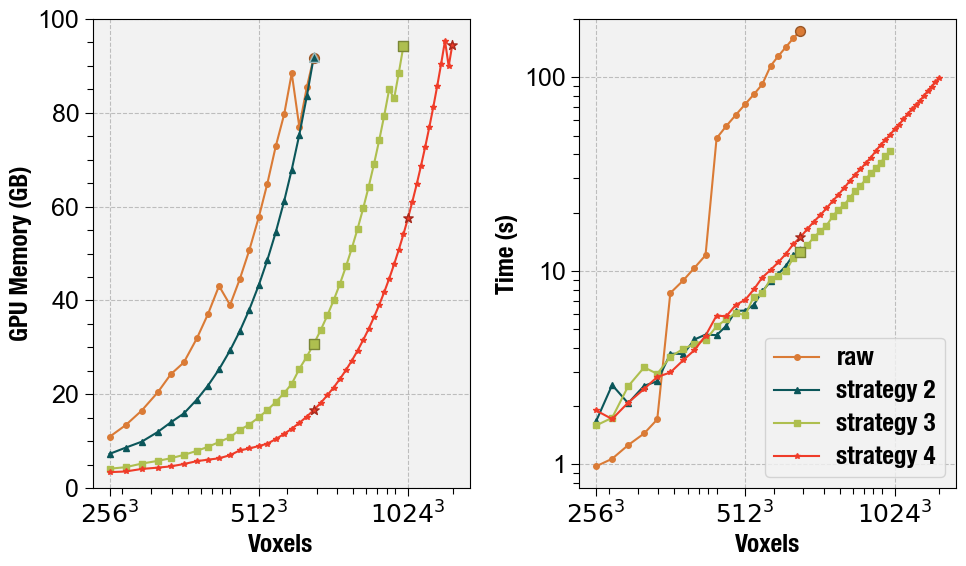

In [10]:

markers = ['o', '^', 's', '*']
fig, ax = plt.subplots(1, 2, figsize=(10, 6))

raw = results['0']
ours1 = results['1']
ours2 = results['2']
ours3 = results['3']
    
ax[0].plot(raw[:, 0], raw[:, 1], c=c[0], label='raw', marker='o', markersize=4)
ax[0].plot(ours1[:, 0], ours1[:, 1], c=c[2], label='strategy 2', marker='^', markersize=4)
ax[0].plot(ours2[:, 0], ours2[:, 1], c=c[3], label='strategy 3', marker='s', markersize=4)
ax[0].plot(ours3[:, 0], ours3[:, 1], c=c[4], label='strategy 4', marker='*', markersize=4)


x = [raw[-1, 0],]
y = [raw[-1, 1],]
ax[0].scatter(x, y, c=c[0], s=50, marker='o', zorder=10, edgecolor=darken(c[0]))
x = [ours1[-1, 0],]
y = [ours1[-1, 1],]
ax[0].scatter(x, y, c=c[2], s=50, marker='^', zorder=10, edgecolor=lighten(c[2], 0.4))
x = [ours2[raw.shape[0]-1, 0], ours2[-1, 0]]
y = [ours2[raw.shape[0]-1, 1], ours2[-1, 1]]
ax[0].scatter(x, y, c=c[3], s=50, marker='s', zorder=10, edgecolor=darken(c[3]))
x = [ours3[raw.shape[0]-1, 0], 1024**3, ours3[-1, 0]]
y = [ours3[raw.shape[0]-1, 1], ours3[36, 1], ours3[-1, 1]]
ax[0].scatter(x, y, c=c[4], s=50, marker='*', zorder=10, edgecolor=darken(c[4]))



ax[0].set_xscale('log')

xticks = [256**3, 512**3, 1024**3]
xtick_labels = [r'$256^3$', r'$512^3$', r'$1024^3$']
ax[0].set_xticks(xticks)
ax[0].set_xticklabels(xtick_labels)

ax[0].set_xlabel('Voxels')
ax[0].set_ylabel('GPU Memory (GB)')
# ax[0].set_title('GPU Memory Usage')
ax[0].set_ylim(0, 100)
# ax[0].legend()
ax[0].grid(True, linestyle='--', linewidth=0.8, alpha=0.8)


maxt = 0
ax[1].plot(raw[:, 0], raw[:, 2], c=c[0],label='raw', marker='o', markersize=4)
ax[1].plot(ours1[:, 0], ours1[:, 2], c=c[2],label='strategy 2', marker='^', markersize=4)
ax[1].plot(ours2[:, 0], ours2[:, 2], c=c[3],label='strategy 3', marker='s', markersize=4)
ax[1].plot(ours3[:, 0], ours3[:, 2], c=c[4],label='strategy 4', marker='*', markersize=4)

ticks = ax[1].get_yticks()[-1]

x = [raw[-1, 0],]
y = [raw[-1, 2],]
ax[1].scatter(x, y, c=c[0], s=50, marker='o', zorder=10, edgecolor=darken(c[0]))
x = [ours1[-1, 0],]
y = [ours1[-1, 2],]
ax[1].scatter(x, y, c=c[2], s=50, marker='^', zorder=10, edgecolor=lighten(c[2], 0.4))
x = [ours2[raw.shape[0]-1, 0]]
y = [ours2[raw.shape[0]-1, 2]]
ax[1].scatter(x, y, c=c[3], s=50, marker='s', zorder=10, edgecolor=darken(c[3]))
x = [ours3[raw.shape[0]-1, 0]]
y = [ours3[raw.shape[0]-1, 2]]
ax[1].scatter(x, y, c=c[4], s=50, marker='*', zorder=10, edgecolor=darken(c[4]))


ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_ylim(0, ticks)

xticks = [256**3, 512**3, 1024**3]
xtick_labels = [r'$256^3$', r'$512^3$', r'$1024^3$']
ax[1].set_xticks(xticks)
ax[1].set_xticklabels(xtick_labels)

yticks = [1, 10, 100]
ytick_labels = [r'1', r'10', r'100']
ax[1].set_yticks(yticks)
ax[1].set_yticklabels(ytick_labels)

ax[1].set_xlabel('Voxels')
ax[1].set_ylabel('Time (s)')
# ax[1].set_title('Inference Time')
ax[1].legend()
ax[1].grid(True, linestyle='--', linewidth=0.8, alpha=0.8)
set_hcnb()
plt.tight_layout()
# plt.savefig('newpdf/FaultSSL-pre.pdf', bbox_inches='tight', pad_inches=0.01, dpi=600)
plt.show()

In [11]:
results = {}
with open('../../results/infer25ce/gem2.txt', 'r') as f:
    for line in f:
        # 4, [704, 704, 704], 12.56, 2.6860
        # seg this line
        rank, shape, mem, t = re.findall(r'[\d.]+|\[.*?\]', line)
        shape = [int(f.strip()) for f in shape[1:-1].split(',')]
        voxels = shape[0] * shape[1] * shape[2]
        if rank not in results:
            results[rank] = [[voxels, float(mem), float(t)]]
        else:
            results[rank].append([voxels, float(mem), float(t)])

for k in results.keys():
    print(k)
    results[k] = np.array(results[k])

3
0
1
2


/tmp/ipykernel_1946980/2303967883.py:70: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(0, ticks)


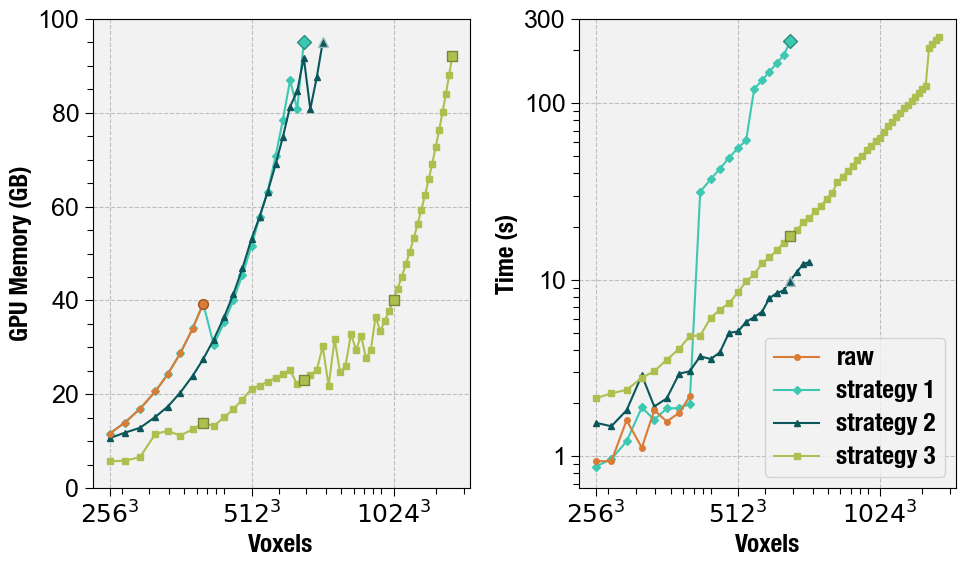

In [12]:
markers = ['o', '^', 's', '*']
fig, ax = plt.subplots(1, 2, figsize=(10, 6))

raw = results['0']
ours1 = results['1']
ours2 = results['2']
ours3 = results['3']

ax[0].plot(raw[:, 0], raw[:, 1], c=c[0], label='raw', marker='o', markersize=4, zorder=5)
ax[0].plot(ours1[:, 0], ours1[:, 1], c=c[1], label='strategy 1', marker='D', markersize=4)    
ax[0].plot(ours2[:, 0], ours2[:, 1], c=c[2], label='strategy 2', marker='^', markersize=4)
ax[0].plot(ours3[:, 0], ours3[:, 1], c=c[3], label='strategy 3', marker='s', markersize=4)


x = [raw[-1, 0],]
y = [raw[-1, 1],]
ax[0].scatter(x, y, c=c[0], s=50, marker='o', zorder=10, edgecolor=darken(c[0]))
x = [ours1[-1, 0],]
y = [ours1[-1, 1],]
ax[0].scatter(x, y, c=c[1], s=50, marker='D', zorder=10, edgecolor=darken(c[1]))
x = [ours2[-1, 0]]
y = [ours2[-1, 1]]
ax[0].scatter(x, y, c=c[2], s=50, marker='^', zorder=10, edgecolor=lighten(c[2], 0.4))
x = [ours3[raw.shape[0]-1, 0], ours3[ours1.shape[0]-1, 0], 1024**3, ours3[-1, 0]]
y = [ours3[raw.shape[0]-1, 1], ours3[ours1.shape[0]-1, 1], ours3[36, 1], ours3[-1, 1]]
ax[0].scatter(x, y, c=c[3], s=50, marker='s', zorder=10, edgecolor=darken(c[3]))




ax[0].set_xscale('log')

xticks = [256**3, 512**3, 1024**3]
xtick_labels = [r'$256^3$', r'$512^3$', r'$1024^3$']
ax[0].set_xticks(xticks)
ax[0].set_xticklabels(xtick_labels)

ax[0].set_xlabel('Voxels')
ax[0].set_ylabel('GPU Memory (GB)')
# ax[0].set_title('GPU Memory Usage')
ax[0].set_ylim(0, 100)
# ax[0].legend()
ax[0].grid(True, linestyle='--', linewidth=0.8, alpha=0.8)


maxt = 0
ax[1].plot(raw[:, 0], raw[:, 2], c=c[0],label='raw', marker='o', markersize=4, zorder=5)
ax[1].plot(ours1[:, 0], ours1[:, 2], c=c[1],label='strategy 1', marker='D', markersize=4)
ax[1].plot(ours2[:, 0], ours2[:, 2], c=c[2],label='strategy 2', marker='^', markersize=4)
ax[1].plot(ours3[:, 0], ours3[:, 2], c=c[3],label='strategy 3', marker='s', markersize=4)

ticks = ax[1].get_yticks()[-1]

# x = [raw[-1, 0],]
# y = [raw[-1, 2],]
# ax[1].scatter(x, y, c=c[0], s=50, marker='o', zorder=10, edgecolor=darken(c[0]))
x = [ours1[-1, 0],]
y = [ours1[-1, 2],]
ax[1].scatter(x, y, c=c[1], s=50, marker='D', zorder=10, edgecolor=darken(c[1]))
x = [ours2[ours1.shape[0]-1, 0]]
y = [ours2[ours1.shape[0]-1, 2]]
ax[1].scatter(x, y, c=c[2], s=50, marker='^', zorder=10, edgecolor=lighten(c[2], 0.4))
x = [ours3[ours1.shape[0]-1, 0]]
y = [ours3[ours1.shape[0]-1, 2]]
ax[1].scatter(x, y, c=c[3], s=50, marker='s', zorder=10, edgecolor=darken(c[3]))


ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_ylim(0, ticks)

xticks = [256**3, 512**3, 1024**3]
xtick_labels = [r'$256^3$', r'$512^3$',  r'$1024^3$']
ax[1].set_xticks(xticks)
ax[1].set_xticklabels(xtick_labels)

yticks = [1, 10, 100, 300]
ytick_labels = [r'1', r'10', r'100', r'300']
ax[1].set_yticks(yticks)
ax[1].set_yticklabels(ytick_labels)

ax[1].set_xlabel('Voxels')
ax[1].set_ylabel('Time (s)')
# ax[1].set_title('Inference Time')
ax[1].legend()
ax[1].grid(True, linestyle='--', linewidth=0.8, alpha=0.8)
set_hcnb()
plt.tight_layout()
# plt.savefig('newpdf/GEM2.pdf', bbox_inches='tight', pad_inches=0.01, dpi=600)
    # plt.savefig('channelseg3d.png', dpi=300)
plt.show()

In [13]:
results = {}
with open('../../results/infer25ce/ChannelSeg3d.txt', 'r') as f:
    for line in f:
        # 4, [704, 704, 704], 12.56, 2.6860
        # seg this line
        rank, shape, mem, t = re.findall(r'[\d.]+|\[.*?\]', line)
        shape = [int(f.strip()) for f in shape[1:-1].split(',')]
        voxels = shape[0] * shape[1] * shape[2]
        if rank not in results:
            results[rank] = [[voxels, float(mem), float(t)]]
        else:
            results[rank].append([voxels, float(mem), float(t)])

for k in results.keys():
    print(k)
    results[k] = np.array(results[k])

1
0


/tmp/ipykernel_1946980/3566489526.py:42: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(0, ticks)


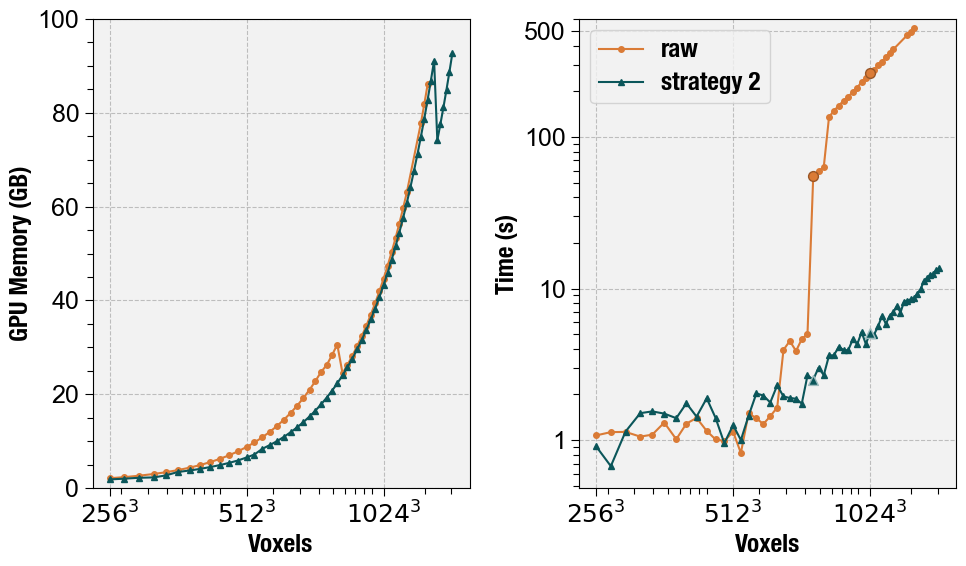

In [14]:

markers = ['o', 'D', '^', 's', '*']
fig, ax = plt.subplots(1, 2, figsize=(10, 6))

raw = results['0']
ours = results['1']
    
ax[0].plot(raw[:, 0], raw[:, 1], label='raw', marker='o', markersize=4)
ax[0].plot(ours[:, 0], ours[:, 1], c='#0b565a', label='strategy 2', marker='^', markersize=4)

# ax[0].plot([1024**3, 1024**3], [0, 100], '--', c='gray', alpha=0.5)
# ax[0].plot([512**3, 512**3], [0, 100], '--',  c='gray', alpha=0.5, zorder=0.5)
ax[0].set_xscale('log')

xticks = [256**3, 512**3, 1024**3]
xtick_labels = [r'$256^3$', r'$512^3$',  r'$1024^3$']
ax[0].set_xticks(xticks)
ax[0].set_xticklabels(xtick_labels)

ax[0].set_xlabel('Voxels')
ax[0].set_ylabel('GPU Memory (GB)')
# ax[0].set_title('GPU Memory Usage')
ax[0].set_ylim(0, 100)
# ax[0].legend()
ax[0].grid(True, linestyle='--', linewidth=0.8, alpha=0.8)


maxt = 0
ax[1].plot(raw[:, 0], raw[:, 2], label='raw', marker='o', markersize=4)
ax[1].plot(ours[:, 0], ours[:, 2], c='#0b565a', label='strategy 2', marker='^', markersize=4)

ticks = ax[1].get_yticks()[-1]

x = [768**3, 1024**3,]
y = [raw[24, 2], raw[36, 2],]
ax[1].scatter(x, y, c=c[0], s=50, marker='o', zorder=10, edgecolor=darken(c[0]))
x = [768**3, 1024**3]
y = [ours[24, 2], ours[36, 2]]
ax[1].scatter(x, y, c=c[2], s=50, marker='^', zorder=10, edgecolor=lighten(c[2], 0.4))

ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_ylim(0, ticks)

xticks = [256**3, 512**3, 1024**3]
xtick_labels = [r'$256^3$', r'$512^3$',  r'$1024^3$']
ax[1].set_xticks(xticks)
ax[1].set_xticklabels(xtick_labels)

yticks = [1, 10, 100, 500]
ytick_labels = [r'1', r'10', r'100', r'500']
ax[1].set_yticks(yticks)
ax[1].set_yticklabels(ytick_labels)

ax[1].set_xlabel('Voxels')
ax[1].set_ylabel('Time (s)')
# ax[1].set_title('Inference Time')
ax[1].legend()
ax[1].grid(True, linestyle='--', linewidth=0.8, alpha=0.8)
set_hcnb()
plt.tight_layout()
# plt.savefig('newpdf/ChannelSeg3d.pdf', bbox_inches='tight', pad_inches=0.01, dpi=600)
    # plt.savefig('channelseg3d.png', dpi=300)
plt.show()

In [15]:
results = {}
with open('../../results/infer25ce/SegFormer3d.txt', 'r') as f:
    for line in f:
        # 4, [704, 704, 704], 12.56, 2.6860
        # seg this line
        rank, shape, mem, t = re.findall(r'[\d.]+|\[.*?\]', line)
        shape = [int(f.strip()) for f in shape[1:-1].split(',')]
        voxels = shape[0] * shape[1] * shape[2]
        if rank not in results:
            results[rank] = [[voxels, float(mem), float(t)]]
        else:
            results[rank].append([voxels, float(mem), float(t)])

for k in results.keys():
    print(k)
    results[k] = np.array(results[k])

0
1
2
3


/tmp/ipykernel_1946980/2766111375.py:70: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(0, ticks)


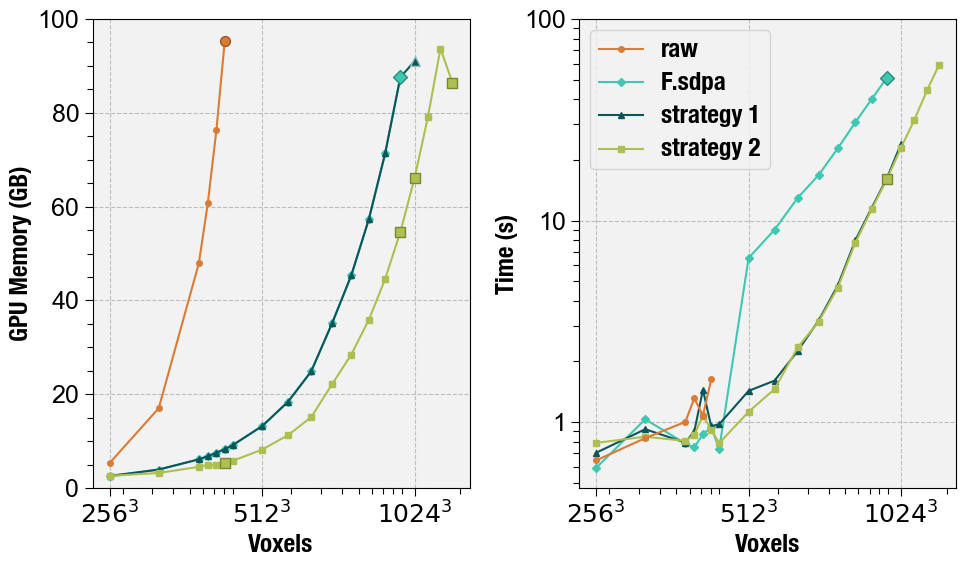

In [16]:

markers = ['o', '^', 's', '*']
fig, ax = plt.subplots(1, 2, figsize=(10, 6))

raw = results['0']
ours1 = results['1']
ours2 = results['2']
ours3 = results['3']

ax[0].plot(raw[:, 0], raw[:, 1], c=c[0], label='raw', marker='o', markersize=4, zorder=5)
ax[0].plot(ours1[:, 0], ours1[:, 1], c=c[1], label='F.sdpa', marker='D', markersize=4)    
ax[0].plot(ours2[:, 0], ours2[:, 1], c=c[2], label='strategy 1', marker='^', markersize=4)
ax[0].plot(ours3[:, 0], ours3[:, 1], c=c[3], label='strategy 2', marker='s', markersize=4)


x = [raw[-1, 0],]
y = [raw[-1, 1],]
ax[0].scatter(x, y, c=c[0], s=50, marker='o', zorder=10, edgecolor=darken(c[0]))
x = [ours1[-1, 0],]
y = [ours1[-1, 1],]
ax[0].scatter(x, y, c=c[1], s=50, marker='D', zorder=10, edgecolor=darken(c[1]))
x = [ours2[-1, 0]]
y = [ours2[-1, 1]]
ax[0].scatter(x, y, c=c[2], s=50, marker='^', zorder=10, edgecolor=lighten(c[2], 0.4))
x = [ours3[raw.shape[0]-1, 0], ours3[ours1.shape[0]-1, 0], 1024**3, ours3[-1, 0]]
y = [ours3[raw.shape[0]-1, 1], ours3[ours1.shape[0]-1, 1], ours3[15, 1], ours3[-1, 1]]
ax[0].scatter(x, y, c=c[3], s=50, marker='s', zorder=10, edgecolor=darken(c[3]))




ax[0].set_xscale('log')

xticks = [256**3, 512**3, 1024**3]
xtick_labels = [r'$256^3$', r'$512^3$', r'$1024^3$']
ax[0].set_xticks(xticks)
ax[0].set_xticklabels(xtick_labels)

ax[0].set_xlabel('Voxels')
ax[0].set_ylabel('GPU Memory (GB)')
# ax[0].set_title('GPU Memory Usage')
ax[0].set_ylim(0, 100)
# ax[0].legend()
ax[0].grid(True, linestyle='--', linewidth=0.8, alpha=0.8)


maxt = 0
ax[1].plot(raw[:, 0], raw[:, 2], c=c[0],label='raw', marker='o', markersize=4, zorder=5)
ax[1].plot(ours1[:, 0], ours1[:, 2], c=c[1],label='F.sdpa', marker='D', markersize=4)
ax[1].plot(ours2[:, 0], ours2[:, 2], c=c[2],label='strategy 1', marker='^', markersize=4)
ax[1].plot(ours3[:, 0], ours3[:, 2], c=c[3],label='strategy 2', marker='s', markersize=4)

ticks = ax[1].get_yticks()[-1]

# x = [raw[-1, 0],]
# y = [raw[-1, 2],]
# ax[1].scatter(x, y, c=c[0], s=50, marker='o', zorder=10, edgecolor=darken(c[0]))
x = [ours1[-1, 0],]
y = [ours1[-1, 2],]
ax[1].scatter(x, y, c=c[1], s=50, marker='D', zorder=10, edgecolor=darken(c[1]))
x = [ours2[ours1.shape[0]-1, 0]]
y = [ours2[ours1.shape[0]-1, 2]]
ax[1].scatter(x, y, c=c[2], s=50, marker='^', zorder=10, edgecolor=lighten(c[2], 0.4))
x = [ours3[ours1.shape[0]-1, 0]]
y = [ours3[ours1.shape[0]-1, 2]]
ax[1].scatter(x, y, c=c[3], s=50, marker='s', zorder=10, edgecolor=darken(c[3]))


ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_ylim(0, ticks)

xticks = [256**3, 512**3, 1024**3]
xtick_labels = [r'$256^3$', r'$512^3$', r'$1024^3$']
ax[1].set_xticks(xticks)
ax[1].set_xticklabels(xtick_labels)
# print(ax[1].get_xlim())

yticks = [1, 10, 100]
ytick_labels = [r'1', r'10', r'100']
ax[1].set_yticks(yticks)
ax[1].set_yticklabels(ytick_labels)

ax[1].set_xlabel('Voxels')
ax[1].set_ylabel('Time (s)')
# ax[1].set_title('Inference Time')
ax[1].legend()
ax[1].grid(True, linestyle='--', linewidth=0.8, alpha=0.8)
set_hcnb()
plt.tight_layout()
# plt.savefig('newpdf/segformer3d.pdf', bbox_inches='tight', pad_inches=0.01, dpi=600)
    # plt.savefig('channelseg3d.png', dpi=300)
plt.show()

In [17]:
results = {}
with open('../../results/infer25ce/Bi21RGT3d.txt', 'r') as f:
    for line in f:
        # 4, [704, 704, 704], 12.56, 2.6860
        # seg this line
        rank, shape, mem, t = re.findall(r'[\d.]+|\[.*?\]', line)
        shape = [int(f.strip()) for f in shape[1:-1].split(',')]
        voxels = shape[0] * shape[1] * shape[2]
        if rank not in results:
            results[rank] = [[voxels, float(mem), float(t)]]
        else:
            results[rank].append([voxels, float(mem), float(t)])

for k in results.keys():
    print(k)
    results[k] = np.array(results[k])

0
2


/tmp/ipykernel_1946980/96144810.py:71: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(0, ticks)


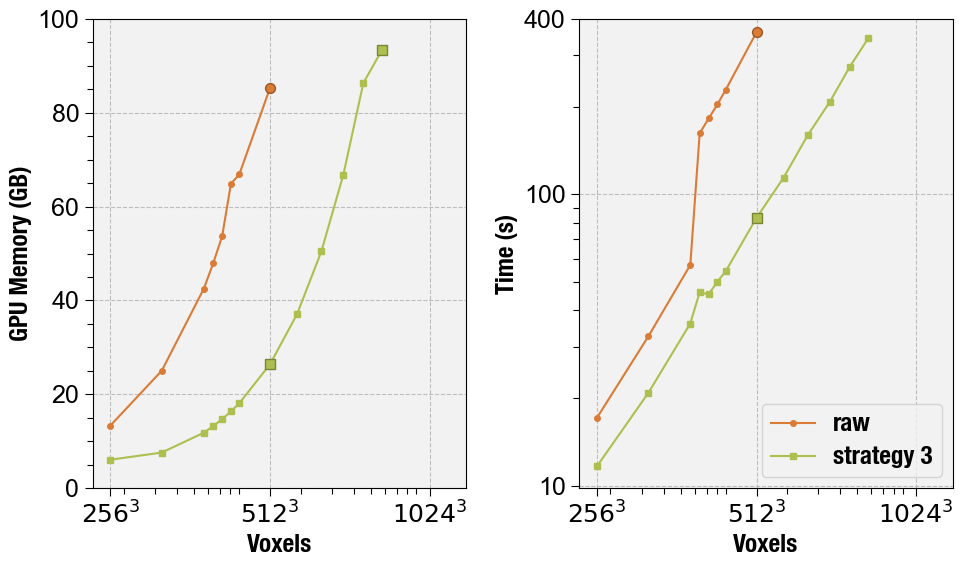

In [18]:

markers = ['o', '^', 's', '*']
fig, ax = plt.subplots(1, 2, figsize=(10, 6))

raw = results['0']
# ours1 = results['1']
# ours2 = results['1']
ours3 = results['2']

ax[0].plot(raw[:, 0], raw[:, 1], c=c[0], label='raw', marker='o', markersize=4, zorder=5)
# ax[0].plot(ours1[:, 0], ours1[:, 1], c=c[1], label='strategy 1', marker='D', markersize=4)    
# ax[0].plot(ours2[:, 0], ours2[:, 1], c=c[2], label='strategy 2', marker='^', markersize=4)
ax[0].plot(ours3[:, 0], ours3[:, 1], c=c[3], label='strategy 3', marker='s', markersize=4)


x = [raw[-1, 0],]
y = [raw[-1, 1],]
ax[0].scatter(x, y, c=c[0], s=50, marker='o', zorder=10, edgecolor=darken(c[0]))
# x = [ours2[-1, 0],]
# y = [ours2[-1, 1],]
# ax[0].scatter(x, y, c=c[1], s=50, marker='D', zorder=10, edgecolor=darken(c[1]))
# x = [ours2[-1, 0]]
# y = [ours2[-1, 1]]
# ax[0].scatter(x, y, c=c[2], s=50, marker='^', zorder=10, edgecolor=lighten(c[2], 0.4))
x = [ours3[raw.shape[0]-1, 0], ours3[-1, 0]]
y = [ours3[raw.shape[0]-1, 1], ours3[-1, 1]]
ax[0].scatter(x, y, c=c[3], s=50, marker='s', zorder=10, edgecolor=darken(c[3]))




ax[0].set_xscale('log')

xticks = [256**3, 512**3, 1024**3]
xtick_labels = [r'$256^3$', r'$512^3$', r'$1024^3$']
ax[0].set_xticks(xticks)
ax[0].set_xticklabels(xtick_labels)

ax[0].set_xlabel('Voxels')
ax[0].set_ylabel('GPU Memory (GB)')
# ax[0].set_title('GPU Memory Usage')
ax[0].set_ylim(0, 100)
ax[0].set_xlim(13280543.677318843, 1200**3)
# ax[0].legend()
ax[0].grid(True, linestyle='--', linewidth=0.8, alpha=0.8)


maxt = 0
ax[1].plot(raw[:, 0], raw[:, 2], c=c[0],label='raw', marker='o', markersize=4, zorder=5)
# ax[1].plot(ours1[:, 0], ours1[:, 2], c=c[1],label='strategy 1', marker='D', markersize=4)
# ax[1].plot(ours2[:, 0], ours2[:, 2], c=c[2],label='strategy 2', marker='^', markersize=4)
ax[1].plot(ours3[:, 0], ours3[:, 2], c=c[3],label='strategy 3', marker='s', markersize=4)

ticks = ax[1].get_yticks()[-1]

x = [raw[-1, 0],]
y = [raw[-1, 2],]
ax[1].scatter(x, y, c=c[0], s=50, marker='o', zorder=10, edgecolor=darken(c[0]))
# x = [ours2[-1, 0],]
# y = [ours2[-1, 2],]
# ax[1].scatter(x, y, c=c[1], s=50, marker='D', zorder=10, edgecolor=darken(c[1]))
# x = [ours2[ours2.shape[0]-1, 0]]
# y = [ours2[ours2.shape[0]-1, 2]]
# ax[1].scatter(x, y, c=c[2], s=50, marker='^', zorder=10, edgecolor=lighten(c[2], 0.4))
x = [ours3[raw.shape[0]-1, 0]]
y = [ours3[raw.shape[0]-1, 2]]
ax[1].scatter(x, y, c=c[3], s=50, marker='s', zorder=10, edgecolor=darken(c[3]))


ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_ylim(0, ticks)
ax[1].set_xlim(13280543.677318843, 1200**3)


xticks = [256**3, 512**3, 1024**3]
xtick_labels = [r'$256^3$', r'$512^3$', r'$1024^3$']
ax[1].set_xticks(xticks)
ax[1].set_xticklabels(xtick_labels)

yticks = [10, 100, 400]
ytick_labels = [r'10', r'100', r'400']
ax[1].set_yticks(yticks)
ax[1].set_yticklabels(ytick_labels)

ax[1].set_xlabel('Voxels')
ax[1].set_ylabel('Time (s)')
# ax[1].set_title('Inference Time')
ax[1].legend()
ax[1].grid(True, linestyle='--', linewidth=0.8, alpha=0.8)
set_hcnb()
plt.tight_layout()

# plt.savefig('newpdf/bi21rgt3d.pdf', bbox_inches='tight', pad_inches=0.01, dpi=600)
    # plt.savefig('channelseg3d.png', dpi=300)
plt.show()

In [19]:
results = {}
with open('../../results/infer25ce/DeepISMNet.txt', 'r') as f:
    for line in f:
        # 4, [704, 704, 704], 12.56, 2.6860
        # seg this line
        rank, shape, mem, t = re.findall(r'[\d.]+|\[.*?\]', line)
        shape = [int(f.strip()) for f in shape[1:-1].split(',')]
        voxels = shape[0] * shape[1] * shape[2]
        if rank not in results:
            results[rank] = [[voxels, float(mem), float(t)]]
        else:
            results[rank].append([voxels, float(mem), float(t)])

for k in results.keys():
    print(k)
    results[k] = np.array(results[k])

0
2
3


/tmp/ipykernel_1946980/1787708027.py:71: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(0, ticks)


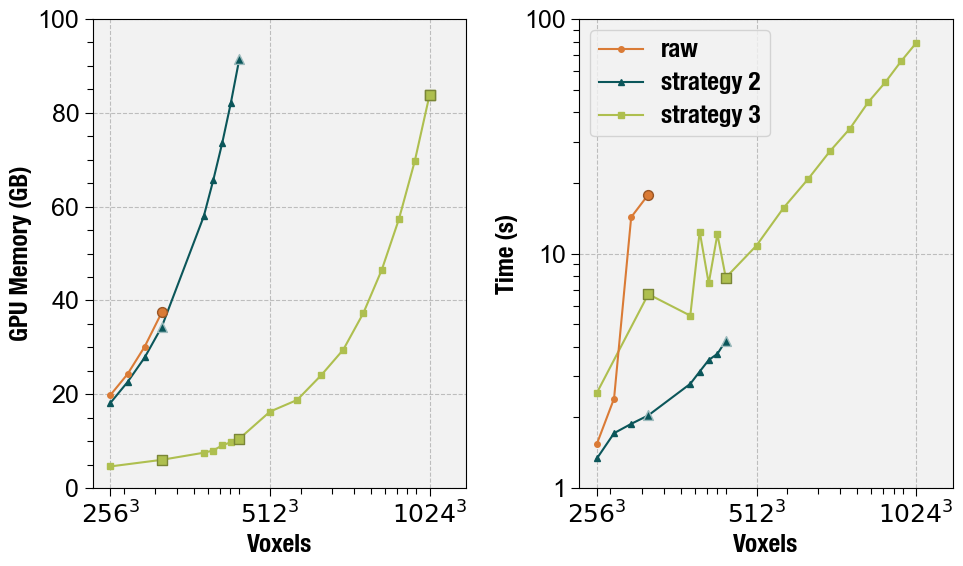

In [20]:
markers = ['o', '^', 's', '*']
fig, ax = plt.subplots(1, 2, figsize=(10, 6))

raw = results['0']
# ours1 = results['1']
ours2 = results['2']
ours3 = results['3']

ax[0].plot(raw[:, 0], raw[:, 1], c=c[0], label='raw', marker='o', markersize=4, zorder=5)
# ax[0].plot(ours1[:, 0], ours1[:, 1], c=c[1], label='strategy 1', marker='D', markersize=4)    
ax[0].plot(ours2[:, 0], ours2[:, 1], c=c[2], label='strategy 2', marker='^', markersize=4)
ax[0].plot(ours3[:, 0], ours3[:, 1], c=c[3], label='strategy 3', marker='s', markersize=4)


x = [raw[-1, 0],]
y = [raw[-1, 1],]
ax[0].scatter(x, y, c=c[0], s=50, marker='o', zorder=10, edgecolor=darken(c[0]))
# x = [ours2[-1, 0],]
# y = [ours2[-1, 1],]
# ax[0].scatter(x, y, c=c[1], s=50, marker='D', zorder=10, edgecolor=darken(c[1]))
x = [ours2[3, 0], ours2[-1, 0]]
y = [ours2[3, 1], ours2[-1, 1]]
ax[0].scatter(x, y, c=c[2], s=50, marker='^', zorder=10, edgecolor=lighten(c[2], 0.4))
x = [ours3[1, 0], ours3[6, 0], 1024**3, ours3[-1, 0]]
y = [ours3[1, 1], ours3[6, 1], ours3[15, 1], ours3[-1, 1]]
ax[0].scatter(x, y, c=c[3], s=50, marker='s', zorder=10, edgecolor=darken(c[3]))




ax[0].set_xscale('log')

xticks = [256**3, 512**3, 1024**3]
xtick_labels = [r'$256^3$', r'$512^3$', r'$1024^3$']
ax[0].set_xticks(xticks)
ax[0].set_xticklabels(xtick_labels)

ax[0].set_xlabel('Voxels')
ax[0].set_ylabel('GPU Memory (GB)')
# ax[0].set_title('GPU Memory Usage')
ax[0].set_ylim(0, 100)
# ax[0].legend()
ax[0].grid(True, linestyle='--', linewidth=0.8, alpha=0.8)
ax[0].set_xlim(13280543.677318843, 1200**3)


maxt = 0
ax[1].plot(raw[:, 0], raw[:, 2], c=c[0],label='raw', marker='o', markersize=4, zorder=5)
# ax[1].plot(ours1[:, 0], ours1[:, 2], c=c[1],label='strategy 1', marker='D', markersize=4)
ax[1].plot(ours2[:, 0], ours2[:, 2], c=c[2],label='strategy 2', marker='^', markersize=4)
ax[1].plot(ours3[:, 0], ours3[:, 2], c=c[3],label='strategy 3', marker='s', markersize=4)

ticks = ax[1].get_yticks()[-1]

x = [raw[-1, 0],]
y = [raw[-1, 2],]
ax[1].scatter(x, y, c=c[0], s=50, marker='o', zorder=10, edgecolor=darken(c[0]))
# x = [ours2[-1, 0],]
# y = [ours2[-1, 2],]
# ax[1].scatter(x, y, c=c[1], s=50, marker='D', zorder=10, edgecolor=darken(c[1]))
x = [ours2[3, 0], ours2[ours2.shape[0]-1, 0]]
y = [ours2[3, 2], ours2[ours2.shape[0]-1, 2]]
ax[1].scatter(x, y, c=c[2], s=50, marker='^', zorder=10, edgecolor=lighten(c[2], 0.4))
x = [ours3[1, 0], ours3[6, 0]]
y = [ours3[1, 2], ours3[6, 2]]
ax[1].scatter(x, y, c=c[3], s=50, marker='s', zorder=10, edgecolor=darken(c[3]))


ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_ylim(0, ticks)
ax[1].set_xlim(13280543.677318843, 1200**3)


xticks = [256**3, 512**3, 1024**3]
xtick_labels = [r'$256^3$', r'$512^3$', r'$1024^3$']
ax[1].set_xticks(xticks)
ax[1].set_xticklabels(xtick_labels)

yticks = [1, 10, 100]
ytick_labels = [r'1', r'10', r'100']
ax[1].set_yticks(yticks)
ax[1].set_yticklabels(ytick_labels)

ax[1].set_xlabel('Voxels')
ax[1].set_ylabel('Time (s)')
# ax[1].set_title('Inference Time')
ax[1].legend()
ax[1].grid(True, linestyle='--', linewidth=0.8, alpha=0.8)
set_hcnb()
plt.tight_layout()
# plt.savefig('newpdf/deepismnet.pdf', bbox_inches='tight', pad_inches=0.01, dpi=600)
    # plt.savefig('channelseg3d.png', dpi=300)
plt.show()

In [21]:
results = {}
with open('../../results/infer25ce/FaultSSL-iou.txt', 'r') as f:
    for line in f:
        # 4, [704, 704, 704], 12.56, 2.6860
        # seg this line
        rank, shape, mem, t = re.findall(r'[\d.]+|\[.*?\]', line)
        shape = [int(f.strip()) for f in shape[1:-1].split(',')]
        voxels = shape[0] * shape[1] * shape[2]
        if rank not in results:
            results[rank] = [[voxels, float(mem), float(t)]]
        else:
            results[rank].append([voxels, float(mem), float(t)])

for k in results.keys():
    print(k)
    results[k] = np.array(results[k])

0
1
3
2


/tmp/ipykernel_1946980/3834505118.py:69: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(0, ticks)


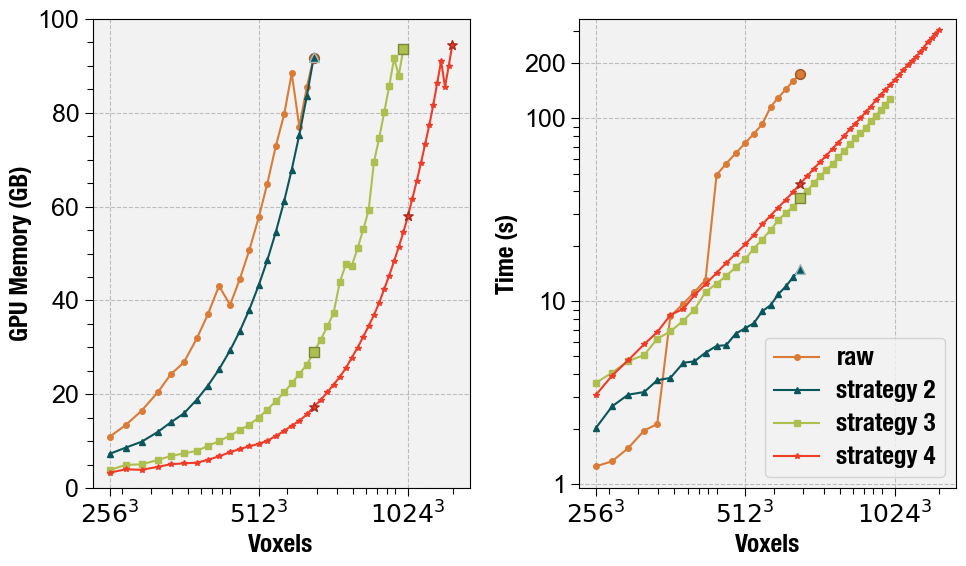

In [22]:
markers = ['o', '^', 's', '*']
fig, ax = plt.subplots(1, 2, figsize=(10, 6))

raw = results['0']
ours1 = results['1']
ours2 = results['2']
ours3 = results['3']
    
ax[0].plot(raw[:, 0], raw[:, 1], c=c[0], label='raw', marker='o', markersize=4)
ax[0].plot(ours1[:, 0], ours1[:, 1], c=c[2], label='strategy 2', marker='^', markersize=4)
ax[0].plot(ours2[:, 0], ours2[:, 1], c=c[3], label='strategy 3', marker='s', markersize=4)
ax[0].plot(ours3[:, 0], ours3[:, 1], c=c[4], label='strategy 4', marker='*', markersize=4)


x = [raw[-1, 0],]
y = [raw[-1, 1],]
ax[0].scatter(x, y, c=c[0], s=50, marker='o', zorder=10, edgecolor=darken(c[0]))
x = [ours1[-1, 0],]
y = [ours1[-1, 1],]
ax[0].scatter(x, y, c=c[2], s=50, marker='^', zorder=10, edgecolor=lighten(c[2], 0.4))
x = [ours2[raw.shape[0]-1, 0], ours2[-1, 0]]
y = [ours2[raw.shape[0]-1, 1], ours2[-1, 1]]
ax[0].scatter(x, y, c=c[3], s=50, marker='s', zorder=10, edgecolor=darken(c[3]))
x = [ours3[raw.shape[0]-1, 0], 1024**3, ours3[-1, 0]]
y = [ours3[raw.shape[0]-1, 1], ours3[36, 1], ours3[-1, 1]]
ax[0].scatter(x, y, c=c[4], s=50, marker='*', zorder=10, edgecolor=darken(c[4]))



ax[0].set_xscale('log')

xticks = [256**3, 512**3, 1024**3]
xtick_labels = [r'$256^3$', r'$512^3$', r'$1024^3$']
ax[0].set_xticks(xticks)
ax[0].set_xticklabels(xtick_labels)

ax[0].set_xlabel('Voxels')
ax[0].set_ylabel('GPU Memory (GB)')
# ax[0].set_title('GPU Memory Usage')
ax[0].set_ylim(0, 100)
# ax[0].legend()
ax[0].grid(True, linestyle='--', linewidth=0.8, alpha=0.8)


maxt = 0
ax[1].plot(raw[:, 0], raw[:, 2], c=c[0],label='raw', marker='o', markersize=4)
ax[1].plot(ours1[:, 0], ours1[:, 2], c=c[2],label='strategy 2', marker='^', markersize=4)
ax[1].plot(ours2[:, 0], ours2[:, 2], c=c[3],label='strategy 3', marker='s', markersize=4)
ax[1].plot(ours3[:, 0], ours3[:, 2], c=c[4],label='strategy 4', marker='*', markersize=4)

ticks = ax[1].get_yticks()[-1]

x = [raw[-1, 0],]
y = [raw[-1, 2],]
ax[1].scatter(x, y, c=c[0], s=50, marker='o', zorder=10, edgecolor=darken(c[0]))
x = [ours1[-1, 0],]
y = [ours1[-1, 2],]
ax[1].scatter(x, y, c=c[2], s=50, marker='^', zorder=10, edgecolor=lighten(c[2], 0.4))
x = [ours2[raw.shape[0]-1, 0]]
y = [ours2[raw.shape[0]-1, 2]]
ax[1].scatter(x, y, c=c[3], s=50, marker='s', zorder=10, edgecolor=darken(c[3]))
x = [ours3[raw.shape[0]-1, 0]]
y = [ours3[raw.shape[0]-1, 2]]
ax[1].scatter(x, y, c=c[4], s=50, marker='*', zorder=10, edgecolor=darken(c[4]))


ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_ylim(0, ticks)

xticks = [256**3, 512**3, 1024**3]
xtick_labels = [r'$256^3$', r'$512^3$', r'$1024^3$']
ax[1].set_xticks(xticks)
ax[1].set_xticklabels(xtick_labels)

yticks = [1, 10, 100, 200]
ytick_labels = [r'1', r'10', r'100', r'200']
ax[1].set_yticks(yticks)
ax[1].set_yticklabels(ytick_labels)

ax[1].set_xlabel('Voxels')
ax[1].set_ylabel('Time (s)')
# ax[1].set_title('Inference Time')
ax[1].legend()
ax[1].grid(True, linestyle='--', linewidth=0.8, alpha=0.8)
set_hcnb()
plt.tight_layout()
# plt.savefig('newpdf/FaultSSL-iou.pdf', bbox_inches='tight', pad_inches=0.01, dpi=600)
    # plt.savefig('channelseg3d.png', dpi=300)
plt.show()

In [23]:
datas = []
with open('../../results/infer25ce/results.txt', 'r') as f:
    begin = False
    for line in f:
        if begin and 'model' in line:
            break
        if 'Wang25Channel' in line:
            begin = True
            continue
        if 'shape' in line or line.strip() == '':
            continue
        
        if not begin:
            continue
        items = line.split('],')[1].strip()

        d = [float(x.strip()) for x in items.split()]
        if len(d) == 5:
            voxels, gpu, time, gpu2, time2 = d
        elif len(d) == 3:
            voxels, gpu2, time2 = d
            gpu = -1
            time = -1
        else:
            voxels, gpu, time, gpu2, time2 = -1, -1, -1, -1, -1
        datas.append([voxels, gpu, time, gpu2, time2])
datas = np.array(datas)
datas.shape

(64, 5)

/tmp/ipykernel_1946980/463073077.py:53: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(0, ticks)


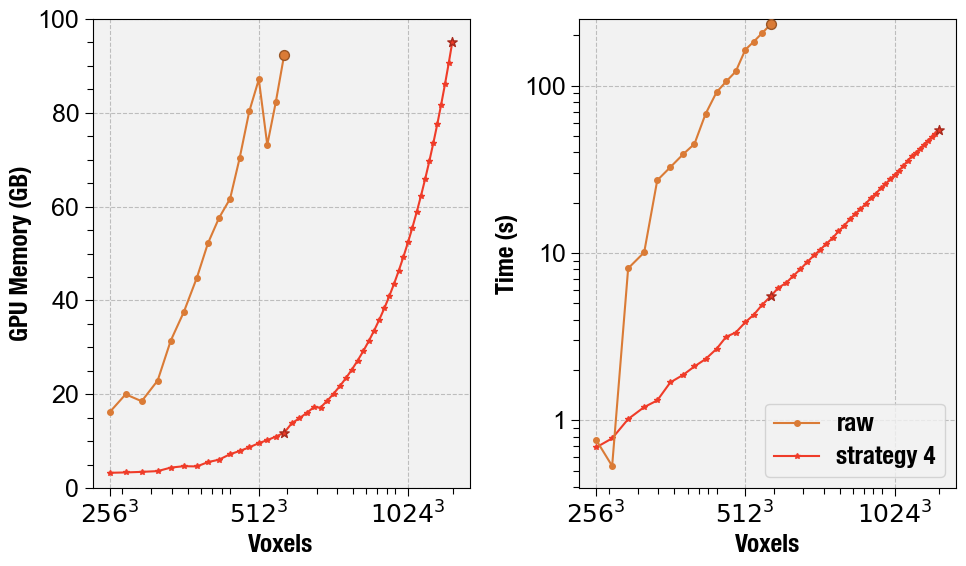

In [24]:

markers = ['o', '^', 's', '*']
fig, ax = plt.subplots(1, 2, figsize=(10, 6))

raw = datas[:, [0, 1, 2]]
raw = raw[raw[:, 1] > 0]
ours = datas[:, [0, 3, 4]]
ours = ours[ours[:, 1] > 0]

ax[0].plot(raw[:, 0], raw[:, 1], c=c[0], label='raw', marker='o', markersize=4, zorder=5)
ax[0].plot(ours[:, 0], ours[:, 1], c=c[4], label='strategy 4', marker='*', markersize=4)    


x = [raw[-1, 0],]
y = [raw[-1, 1],]
ax[0].scatter(x, y, c=c[0], s=50, marker='o', zorder=10, edgecolor=darken(c[0]))
x = [ours[raw.shape[0]-1, 0], ours[-1, 0]]
y = [ours[raw.shape[0]-1, 1], ours[-1, 1]]
ax[0].scatter(x, y, c=c[4], s=50, marker='*', zorder=10, edgecolor=darken(c[4]))



ax[0].set_xscale('log')

xticks = [256**3, 512**3, 1024**3]
xtick_labels = [r'$256^3$', r'$512^3$', r'$1024^3$']
ax[0].set_xticks(xticks)
ax[0].set_xticklabels(xtick_labels)

ax[0].set_xlabel('Voxels')
ax[0].set_ylabel('GPU Memory (GB)')
# ax[0].set_title('GPU Memory Usage')
ax[0].set_ylim(0, 100)
# ax[0].legend()
ax[0].grid(True, linestyle='--', linewidth=0.8, alpha=0.8)


maxt = 0
ax[1].plot(raw[:, 0], raw[:, 2], c=c[0],label='raw', marker='o', markersize=4, zorder=5)
ax[1].plot(ours[:, 0], ours[:, 2], c=c[4],label='strategy 4', marker='*', markersize=4)

ticks = ax[1].get_yticks()[-1]

x = [raw[-1, 0],]
y = [raw[-1, 2],]
ax[1].scatter(x, y, c=c[0], s=50, marker='o', zorder=10, edgecolor=darken(c[0]))
x = [ours[raw.shape[0]-1, 0], ours[-1, 0],]
y = [ours[raw.shape[0]-1, 2], ours[-1, 2],]
ax[1].scatter(x, y, c=c[4], s=50, marker='*', zorder=10, edgecolor=darken(c[4]))


ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_ylim(0, ticks)

xticks = [256**3, 512**3, 1024**3]
xtick_labels = [r'$256^3$', r'$512^3$', r'$1024^3$']
ax[1].set_xticks(xticks)
ax[1].set_xticklabels(xtick_labels)

yticks = [1, 10, 100]
ytick_labels = [r'1', r'10', r'100']
ax[1].set_yticks(yticks)
ax[1].set_yticklabels(ytick_labels)

ax[1].set_xlabel('Voxels')
ax[1].set_ylabel('Time (s)')
# ax[1].set_title('Inference Time')
ax[1].legend(loc="lower right")
ax[1].grid(True, linestyle='--', linewidth=0.8, alpha=0.8)
set_hcnb()
plt.tight_layout()
# plt.savefig('newpdf/Wang25Channel.pdf', bbox_inches='tight', pad_inches=0.01, dpi=600)
    # plt.savefig('channelseg3d.png', dpi=300)
plt.show()

In [25]:
datas = []
with open('../../results/infer25ce/results.txt', 'r') as f:
    begin = False
    for line in f:
        if begin and 'model' in line:
            break
        if 'FaultSeg3dPlus' in line:
            begin = True
            continue
        if 'shape' in line or line.strip() == '':
            continue
        
        if not begin:
            continue
        items = line.split('],')[1].strip()

        d = [float(x.strip()) for x in items.split()]
        if len(d) == 5:
            voxels, gpu, time, gpu2, time2 = d
        elif len(d) == 3:
            voxels, gpu2, time2 = d
            gpu = -1
            time = -1
        else:
            voxels, gpu, time, gpu2, time2 = -1, -1, -1, -1, -1
        datas.append([voxels, gpu, time, gpu2, time2])
datas = np.array(datas)
datas.shape

(64, 5)

/tmp/ipykernel_1946980/3808849930.py:53: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(0, ticks)


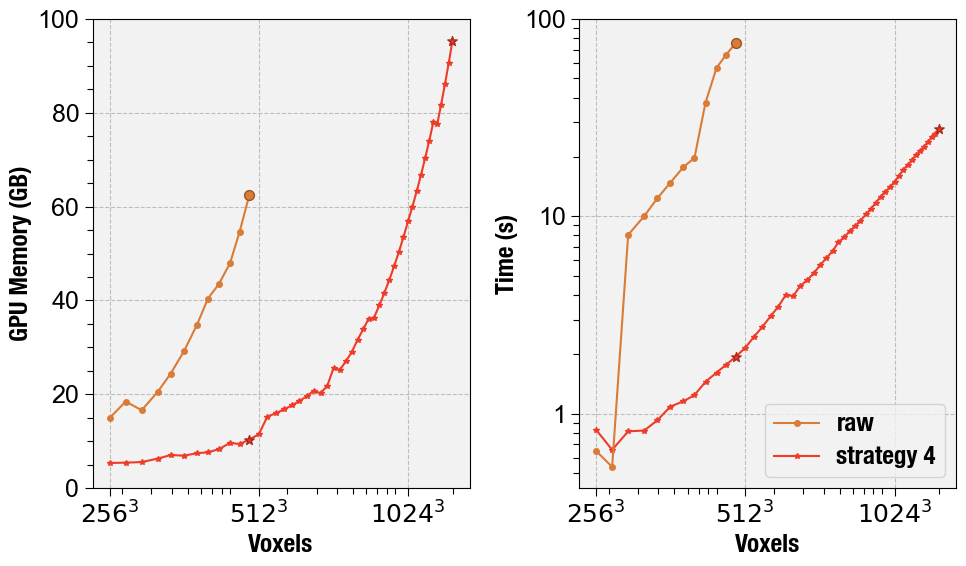

In [26]:

markers = ['o', '^', 's', '*']
fig, ax = plt.subplots(1, 2, figsize=(10, 6))

raw = datas[:, [0, 1, 2]]
raw = raw[raw[:, 1] > 0]
ours = datas[:, [0, 3, 4]]
ours = ours[ours[:, 1] > 0]

ax[0].plot(raw[:, 0], raw[:, 1], c=c[0], label='raw', marker='o', markersize=4, zorder=5)
ax[0].plot(ours[:, 0], ours[:, 1], c=c[4], label='strategy 4', marker='*', markersize=4)    


x = [raw[-1, 0],]
y = [raw[-1, 1],]
ax[0].scatter(x, y, c=c[0], s=50, marker='o', zorder=10, edgecolor=darken(c[0]))
x = [ours[raw.shape[0]-1, 0], ours[-1, 0]]
y = [ours[raw.shape[0]-1, 1], ours[-1, 1]]
ax[0].scatter(x, y, c=c[4], s=50, marker='*', zorder=10, edgecolor=darken(c[4]))



ax[0].set_xscale('log')

xticks = [256**3, 512**3, 1024**3]
xtick_labels = [r'$256^3$', r'$512^3$', r'$1024^3$']
ax[0].set_xticks(xticks)
ax[0].set_xticklabels(xtick_labels)

ax[0].set_xlabel('Voxels')
ax[0].set_ylabel('GPU Memory (GB)')
# ax[0].set_title('GPU Memory Usage')
ax[0].set_ylim(0, 100)
# ax[0].legend()
ax[0].grid(True, linestyle='--', linewidth=0.8, alpha=0.8)


maxt = 0
ax[1].plot(raw[:, 0], raw[:, 2], c=c[0],label='raw', marker='o', markersize=4, zorder=5)
ax[1].plot(ours[:, 0], ours[:, 2], c=c[4],label='strategy 4', marker='*', markersize=4)

ticks = ax[1].get_yticks()[-1]

x = [raw[-1, 0],]
y = [raw[-1, 2],]
ax[1].scatter(x, y, c=c[0], s=50, marker='o', zorder=10, edgecolor=darken(c[0]))
x = [ours[raw.shape[0]-1, 0], ours[-1, 0],]
y = [ours[raw.shape[0]-1, 2], ours[-1, 2],]
ax[1].scatter(x, y, c=c[4], s=50, marker='*', zorder=10, edgecolor=darken(c[4]))


ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_ylim(0, ticks)

xticks = [256**3, 512**3, 1024**3]
xtick_labels = [r'$256^3$', r'$512^3$', r'$1024^3$']
ax[1].set_xticks(xticks)
ax[1].set_xticklabels(xtick_labels)

yticks = [1, 10, 100]
ytick_labels = [r'1', r'10', r'100']
ax[1].set_yticks(yticks)
ax[1].set_yticklabels(ytick_labels)

ax[1].set_xlabel('Voxels')
ax[1].set_ylabel('Time (s)')
# ax[1].set_title('Inference Time')
ax[1].legend(loc="lower right")
ax[1].grid(True, linestyle='--', linewidth=0.8, alpha=0.8)
set_hcnb()
plt.tight_layout()
# plt.savefig('newpdf/FaultSegPlus3d.pdf', bbox_inches='tight', pad_inches=0.01, dpi=600)
    # plt.savefig('channelseg3d.png', dpi=300)
plt.show()